- decision trees

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import graphviz as viz

#ML Libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- cp-chest pain
- tre..-resting blood pressure
- fbs-fasting blood sugar
- res..-resting electrocardiography
- exang-exercise induced agina
- oldpeak-st depresion induced
- slope-slope of peak exercise
- ca-number of major vessel
- thal-normal,fexied defect,reversible defect

In [5]:
# show number of people with heart disease (target column)
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
# %age of male & female
n_female = len(df[df.sex==0])
n_male = len(df[df.sex==1])
total = n_female+n_male

print(f"Females: {n_female/total * 100} %")
print(f"Males: {n_male/total * 100} %")

Females: 30.4390243902439 %
Males: 69.5609756097561 %


In [9]:
# mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [10]:
#nulls check
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.shape

(1025, 14)

In [26]:
# split dataset for training and testing
y_axis = df["target"]
x_axis = df.drop(["target"],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x_axis,y_axis,train_size=0.8,shuffle=True)
print(x_train.head(),"\n<------------->")
print(y_train.head())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
671   52    1   0       125   212    0        1      168      0      1.0   
333   54    0   2       110   214    0        1      158      0      1.6   
161   51    1   2       100   222    0        1      143      1      1.2   
303   60    1   0       145   282    0        0      142      1      2.8   
167   57    0   0       120   354    0        1      163      1      0.6   

     slope  ca  thal  
671      2   2     3  
333      1   0     2  
161      1   0     2  
303      1   2     3  
167      2   0     2   
<------------->
671    0
333    1
161    1
303    0
167    1
Name: target, dtype: int64


In [35]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
y_pred_gini = model.predict(x_test)
y_pred_gini

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
f"Accuracy of model: {accuracy_score(y_test,y_pred_gini):0.6f}"

'Accuracy of model: 0.843902'

In [38]:
#predicting class labels for the training data using the model
y_train_gini = model.predict(x_train)
y_train_gini

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [39]:
# printing accuracy score of training set
print(f"Training set accuracy score: {model.score(x_train,y_train):0.4f}")
print(f"Testing set accuracy score: {model.score(x_test,y_test):0.4f}")


Training set accuracy score: 0.8476
Testing set accuracy score: 0.8439


- visualizations

[Text(0.5, 0.875, 'X[2] <= 0.5\ngini = 0.5\nsamples = 820\nvalue = [400, 420]'),
 Text(0.25, 0.625, 'X[11] <= 0.5\ngini = 0.363\nsamples = 391\nvalue = [298, 93]'),
 Text(0.125, 0.375, 'X[12] <= 2.5\ngini = 0.497\nsamples = 177\nvalue = [95, 82]'),
 Text(0.0625, 0.125, 'gini = 0.383\nsamples = 97\nvalue = [25, 72]'),
 Text(0.1875, 0.125, 'gini = 0.219\nsamples = 80\nvalue = [70, 10]'),
 Text(0.375, 0.375, 'X[9] <= 0.45\ngini = 0.098\nsamples = 214\nvalue = [203, 11]'),
 Text(0.3125, 0.125, 'gini = 0.291\nsamples = 51\nvalue = [42, 9]'),
 Text(0.4375, 0.125, 'gini = 0.024\nsamples = 163\nvalue = [161, 2]'),
 Text(0.75, 0.625, 'X[0] <= 56.5\ngini = 0.362\nsamples = 429\nvalue = [102, 327]'),
 Text(0.625, 0.375, 'X[9] <= 3.55\ngini = 0.203\nsamples = 262\nvalue = [30, 232]'),
 Text(0.5625, 0.125, 'gini = 0.17\nsamples = 256\nvalue = [24, 232]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.875, 0.375, 'X[1] <= 0.5\ngini = 0.491\nsamples = 167\nvalue = [72, 95]'

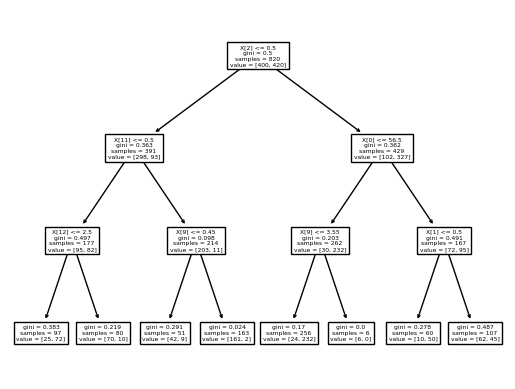

In [40]:
# trying to visualize
tree.plot_tree(model.fit(x_train,y_train))

In [42]:
tree.export_graphviz(model, out_file='heart.dot',
                    feature_names=x_axis.columns,
                    class_names=df['target'].unique().astype(str),
                    label='all',
                    filled=True,
                    rounded=True)

In [49]:
'''graph = viz.Source('heart.dot')
graph.format = 'png'
graph.render('output',view=True)'''

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH